In [32]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, BatchNormalization, Dropout, Flatten
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [2]:
tr = pd.read_csv('D:/School/College/Comp/DataScienceBiotech/datasets/Digit-Recognizer/train.csv')
te = pd.read_csv('D:/School/College/Comp/DataScienceBiotech/datasets/Digit-Recognizer/test.csv')


In [3]:
te.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
tr.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


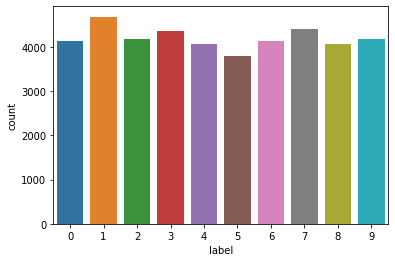

In [5]:
sns.countplot(x=tr['label'])
plt.show()

In [6]:
x_tr = tr.iloc[:,1:].values.copy().astype('float64')
y_tr = tr.iloc[:,0].values.copy()
print(y_tr)
x_te = te.values.copy().astype('float64')

[1 0 1 ... 7 6 9]


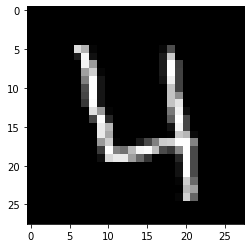

In [7]:
img = np.array(x_tr[3]).reshape(28,28)
plt.imshow(img, cmap="gray")

In [8]:
def preprocess(arr):
    for ind,val in enumerate(arr):
        arr[ind] = np.divide(val,255)
    arr = arr.reshape(arr.shape[0],28,28,1)
    return arr

In [9]:
x_tr = preprocess(x_tr)
x_te = preprocess(x_te)
y_tr = to_categorical(y_tr)

In [11]:
Random_state = 131
x_train, x_val, y_train, y_val = model_selection.train_test_split(x_tr, y_tr, train_size=0.7, random_state=Random_state)

In [20]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3,3), strides = (2,2), padding="same", input_shape=(28, 28, 1), activation = "relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3,3), strides = (2,2), padding="same", activation = "relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3,3), strides = (2,2), padding="same", activation = "relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))   
    model.add(Conv2D(256, (3,3), strides = (2,2), padding="same", activation = "relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Flatten())          
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=["accuracy"])
    return model

In [21]:
batch_size = 20

model_checkpoint = ModelCheckpoint(
    filepath='model',
    monitor='val_accuracy',
    verbose=1,
    mode='max',
    save_best_only=True)

early_stopping = EarlyStopping(monitor='val_accuracy', patience=50, mode='max')

In [22]:
model = KerasClassifier(build_fn=create_model)

In [23]:
model.fit(x_tr, y_tr,       
          steps_per_epoch=np.ceil(len(x_train)/batch_size),
          epochs=100,
          validation_data=(x_val, y_val),
          validation_steps = np.ceil(len(x_val)/batch_size),
          callbacks = [model_checkpoint, early_stopping]          
          )

Epoch 1/100
1470/1470 [==============================] - 51s 33ms/step - loss: 0.5233 - accuracy: 0.8385 - val_loss: 0.0643 - val_accuracy: 0.9802

Epoch 00001: val_accuracy improved from -inf to 0.98016, saving model to model
INFO:tensorflow:Assets written to: model\assets
Epoch 2/100
1470/1470 [==============================] - 46s 31ms/step - loss: 0.1238 - accuracy: 0.9595 - val_loss: 0.0567 - val_accuracy: 0.9812

Epoch 00002: val_accuracy improved from 0.98016 to 0.98119, saving model to model
INFO:tensorflow:Assets written to: model\assets
Epoch 3/100
1470/1470 [==============================] - 49s 33ms/step - loss: 0.0974 - accuracy: 0.9686 - val_loss: 0.0394 - val_accuracy: 0.9869

Epoch 00003: val_accuracy improved from 0.98119 to 0.98691, saving model to model
INFO:tensorflow:Assets written to: model\assets
Epoch 4/100
1470/1470 [==============================] - 52s 35ms/step - loss: 0.0794 - accuracy: 0.9752 - val_loss: 0.0399 - val_accuracy: 0.9875

Epoch 00004: val_accu

1470/1470 [==============================] - 50s 34ms/step - loss: 0.0161 - accuracy: 0.9952 - val_loss: 0.0015 - val_accuracy: 0.9994

Epoch 00034: val_accuracy did not improve from 0.99960
Epoch 35/100
1470/1470 [==============================] - 52s 36ms/step - loss: 0.0150 - accuracy: 0.9954 - val_loss: 0.0016 - val_accuracy: 0.9994

Epoch 00035: val_accuracy did not improve from 0.99960
Epoch 36/100
1470/1470 [==============================] - 48s 33ms/step - loss: 0.0139 - accuracy: 0.9955 - val_loss: 0.0021 - val_accuracy: 0.9992

Epoch 00036: val_accuracy did not improve from 0.99960
Epoch 37/100
1470/1470 [==============================] - 51s 34ms/step - loss: 0.0161 - accuracy: 0.9951 - val_loss: 0.0014 - val_accuracy: 0.9998.0161 - accuracy: 0.99 - ETA: 0s - loss: 0.0161 - accu

Epoch 00037: val_accuracy improved from 0.99960 to 0.99976, saving model to model
INFO:tensorflow:Assets written to: model\assets
Epoch 38/100
1470/1470 [==============================] - 52s 35ms/s

1470/1470 [==============================] - 49s 33ms/step - loss: 0.0102 - accuracy: 0.9970 - val_loss: 6.6375e-04 - val_accuracy: 0.9998

Epoch 00072: val_accuracy did not improve from 1.00000
Epoch 73/100
1470/1470 [==============================] - 52s 35ms/step - loss: 0.0089 - accuracy: 0.9968 - val_loss: 1.2343e-04 - val_accuracy: 1.0000

Epoch 00073: val_accuracy did not improve from 1.00000
Epoch 74/100
1470/1470 [==============================] - 43s 29ms/step - loss: 0.0075 - accuracy: 0.9977 - val_loss: 3.0731e-04 - val_accuracy: 0.9998

Epoch 00074: val_accuracy did not improve from 1.00000
Epoch 75/100
1470/1470 [==============================] - 50s 34ms/step - loss: 0.0073 - accuracy: 0.9974 - val_loss: 1.9089e-04 - val_accuracy: 1.0000

Epoch 00075: val_accuracy did not improve from 1.00000
Epoch 76/100
1470/1470 [==============================] - 52s 35ms/step - loss: 0.0095 - accuracy: 0.9972 - val_loss: 1.2480e-04 - val_accuracy: 1.0000

Epoch 00076: val_accuracy di

In [ ]:
# param_grid = {}
# param_grid['batch_size'] = [10, 15, 20]
# param_grid['epochs'] = [10, 15, 20]

In [ ]:
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
# grid_result = grid.fit(x_tr, y_tr)

In [36]:
final_model = load_model(os.getcwd() + '/model/')


In [40]:
predictions = final_model.predict(x_te)
test_predictions = np.argmax(predictions, axis=1)

In [42]:
submission = pd.DataFrame({'ImageId':te.index.values+1, 'Label':test_predictions})
submission.to_csv('./submission.csv', index=False)